In [114]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats 

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [116]:
df=pd.read_csv(r'C:\Users\Lenovo\Downloads\college_students.csv')
df=df.drop(columns=['Name'])
df

,CGPA,Placement_Exam_Marks,Placed
0,3.77,79.93,1
1,2.49,64.70,0
2,3.34,50.90,1
3,3.54,66.84,1
4,3.92,53.11,1
...,...,...,...
3995,3.71,69.91,1
3996,3.80,54.22,1
3997,3.75,28.93,0
3998,3.62,77.52,0


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_87660\3095474328.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Placement_Exam_Marks'])


((array([-3.57776594, -3.33887858, -3.20703053, ...,  3.20703053,
          3.33887858,  3.57776594]),
  array([ 11.68,  12.35,  12.44, ..., 100.  , 100.  , 100.  ])),
 (15.184303793996104, 59.51838000000001, 0.9996160919178031))

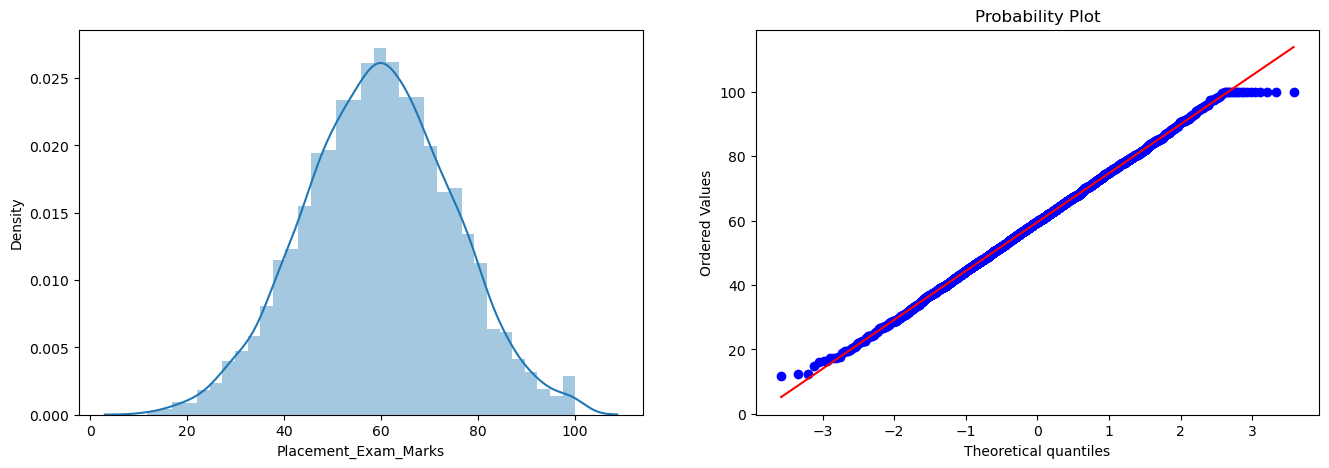

In [118]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Placement_Exam_Marks'])

plt.subplot(1,2,2)
stats.probplot(df['Placement_Exam_Marks'],dist="norm",plot=plt)

In [127]:
print('mean value of marks',df['Placement_Exam_Marks'].mean())
print('std value of marks',df['Placement_Exam_Marks'].std())
print('min value of marks',df['Placement_Exam_Marks'].min())
print('max value of marks',df['Placement_Exam_Marks'].max())


mean value of marks 59.51838000000001
std value of marks 15.179659801639911
min value of marks 11.68
max value of marks 100.0


In [129]:
# finding the boundary values 
print('highest allowed values',df['Placement_Exam_Marks'].mean()+3*df['Placement_Exam_Marks'].std())
print('lowest allowed values',df['Placement_Exam_Marks'].mean()-3*df['Placement_Exam_Marks'].std())

highest allowed values 105.05735940491974
lowest allowed values 13.979400595080278


In [131]:
# finding the outliers
df[(df['Placement_Exam_Marks']>105.05735940491974) | (df['Placement_Exam_Marks']<13.979400595080278)]

,CGPA,Placement_Exam_Marks,Placed
1567,3.95,12.44,0
1621,3.97,12.35,0
3982,3.87,11.68,1


# trimming

In [137]:
new_df=df[(df['Placement_Exam_Marks']<105.05735940491974) & (df['Placement_Exam_Marks']>13.979400595080278)]
new_df

,CGPA,Placement_Exam_Marks,Placed
0,3.77,79.93,1
1,2.49,64.70,0
2,3.34,50.90,1
3,3.54,66.84,1
4,3.92,53.11,1
...,...,...,...
3995,3.71,69.91,1
3996,3.80,54.22,1
3997,3.75,28.93,0
3998,3.62,77.52,0


In [163]:
# approach 2 
# calculating Z-score

df['z_score']=(df['Placement_Exam_Marks']-df['Placement_Exam_Marks'].mean())/df['Placement_Exam_Marks'].std()

In [165]:
df

,CGPA,Placement_Exam_Marks,Placed,cgpa_score,z_score
0,3.77,79.93,1,0.538140,1.344669
1,2.49,64.70,0,-2.047179,0.341353
2,3.34,50.90,1,-0.330365,-0.567758
3,3.54,66.84,1,0.073591,0.482331
4,3.92,53.11,1,0.841107,-0.422169
...,...,...,...,...,...
3995,3.71,69.91,1,0.416953,0.684575
3996,3.80,54.22,1,0.598734,-0.349045
3997,3.75,28.93,0,0.497745,-2.015090
3998,3.62,77.52,0,0.235173,1.185904


In [185]:
df[df['z_score'] > 3],
df[df['z_score'] < -3]

,CGPA,Placement_Exam_Marks,Placed,cgpa_score,z_score
1567,3.95,12.44,0,0.901701,-3.101412
1621,3.97,12.35,0,0.942096,-3.107341
3982,3.87,11.68,1,0.740118,-3.151479


In [207]:
new_df1=df[(df['Placement_Exam_Marks'] > -3) & (df['Placement_Exam_Marks'] > 3) ]
new_df1

,CGPA,Placement_Exam_Marks,Placed,cgpa_score,z_score
0,3.77,79.93,1,0.538140,1.344669
1,2.49,64.70,0,-2.047179,0.341353
2,3.34,50.90,1,-0.330365,-0.567758
3,3.54,66.84,1,0.073591,0.482331
4,3.92,53.11,1,0.841107,-0.422169
...,...,...,...,...,...
3995,3.71,69.91,1,0.416953,0.684575
3996,3.80,54.22,1,0.598734,-0.349045
3997,3.75,28.93,0,0.497745,-2.015090
3998,3.62,77.52,0,0.235173,1.185904


In [209]:
# capping 

In [211]:
upper_limit=df['Placement_Exam_Marks'].mean()+3*df['Placement_Exam_Marks'].std()
lower_limit=df['Placement_Exam_Marks'].mean()-3*df['Placement_Exam_Marks'].std()


In [213]:
df['Placement_Exam_Marks'] = np.where(
    df['Placement_Exam_Marks']>upper_limit,
    upper_limit,
    np.where(
        df['Placement_Exam_Marks']<lower_limit,
        lower_limit,
        df['Placement_Exam_Marks']
    )
)

In [215]:
df['Placement_Exam_Marks'].describe()

count    4000.000000
mean       59.519747
std        15.175472
min        13.979401
25%        49.130000
50%        59.615000
75%        70.007500
max       100.000000
Name: Placement_Exam_Marks, dtype: float64

In [221]:
df['CGPA'].skew()

-1.908073581247061

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_87660\3182410131.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CGPA'])


((array([-3.57776594, -3.33887858, -3.20703053, ...,  3.20703053,
          3.33887858,  3.57776594]),
  array([0.  , 0.14, 0.28, ..., 4.  , 4.  , 4.  ])),
 (0.4489777366606404, 3.503565, 0.9062111114101301))

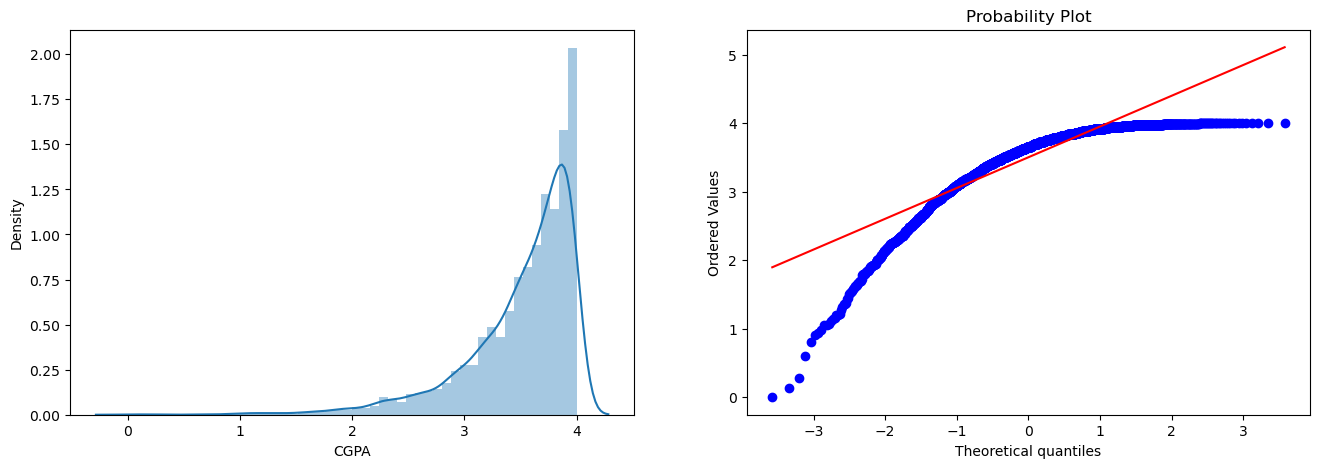

In [223]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['CGPA'])

plt.subplot(1,2,2)
stats.probplot(df['CGPA'],dist="norm",plot=plt)

In [225]:
print('mean value of marks',df['CGPA'].mean())
print('std value of marks',df['CGPA'].std())
print('min value of marks',df['CGPA'].min())
print('max value of marks',df['CGPA'].max())

mean value of marks 3.503565
std value of marks 0.495103294872038
min value of marks 0.0
max value of marks 4.0


In [233]:
df['CGPA'].describe()

count    4000.000000
mean        3.503565
std         0.495103
min         0.000000
25%         3.310000
50%         3.650000
75%         3.860000
max         4.000000
Name: CGPA, dtype: float64

<Axes: xlabel='CGPA'>

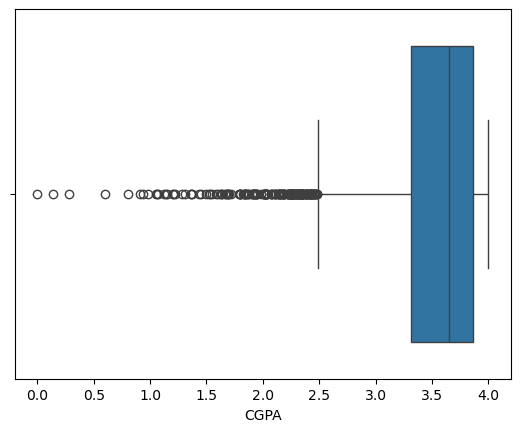

In [251]:
sns.boxplot(df['CGPA'],orient='h')

In [255]:
percentile25=df['CGPA'].quantile(0.25)
percentile75=df['CGPA'].quantile(0.75)

In [261]:
iqr=percentile75-percentile25

In [269]:
upper_limit=percentile75+1.5 * iqr
lower_limit=percentile25-1.5 * iqr

In [271]:
print('upper limit',upper_limit)
print('lower limit',lower_limit)

upper limit 4.685
lower limit 2.4850000000000003


In [281]:
df[df['CGPA']<lower_limit]

,CGPA,Placement_Exam_Marks,Placed,cgpa_score,z_score
11,2.25,53.76,1,-2.531926,-0.379348
34,2.31,94.22,0,-2.410739,2.286060
50,2.25,73.51,0,-2.531926,0.921735
69,1.83,78.74,0,-3.380234,1.266275
139,2.22,45.82,0,-2.592520,-0.902417
...,...,...,...,...,...
3913,2.08,45.95,0,-2.875289,-0.893853
3914,2.31,39.42,0,-2.410739,-1.324034
3924,1.68,48.31,0,-3.683201,-0.738382
3952,2.16,45.31,0,-2.713706,-0.936014


## triming

In [288]:
new_df=df[df['CGPA']>lower_limit]

In [290]:
new_df.shape

(3808, 5)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_87660\3986268132.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CGPA'])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_87660\3986268132.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['CGPA'])


<Axes: xlabel='CGPA'>

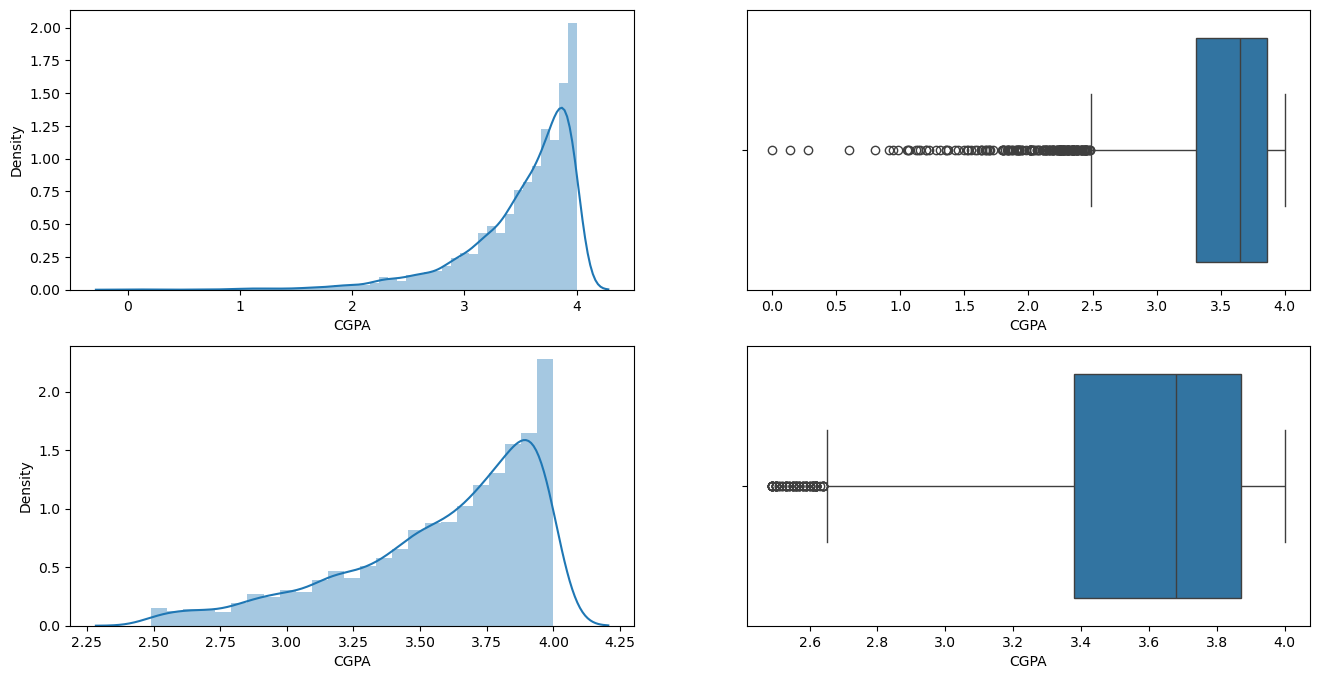

In [300]:
# comparing 

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['CGPA'])

plt.subplot(2,2,2)
sns.boxplot(df['CGPA'],orient='h')

plt.subplot(2,2,3)
sns.distplot(new_df['CGPA'])

plt.subplot(2,2,4)
sns.boxplot(new_df['CGPA'],orient='h')

# capping 

In [307]:
new_df_cap=df.copy()

new_df_cap['CGPA']=np.where(
    new_df_cap['CGPA'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['CGPA'] < lower_limit,
        lower_limit,
        new_df_cap['CGPA']
    )
)

In [309]:
new_df_cap.shape

(4000, 5)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_87660\3046214200.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CGPA'])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_87660\3046214200.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap['CGPA'])


<Axes: xlabel='CGPA'>

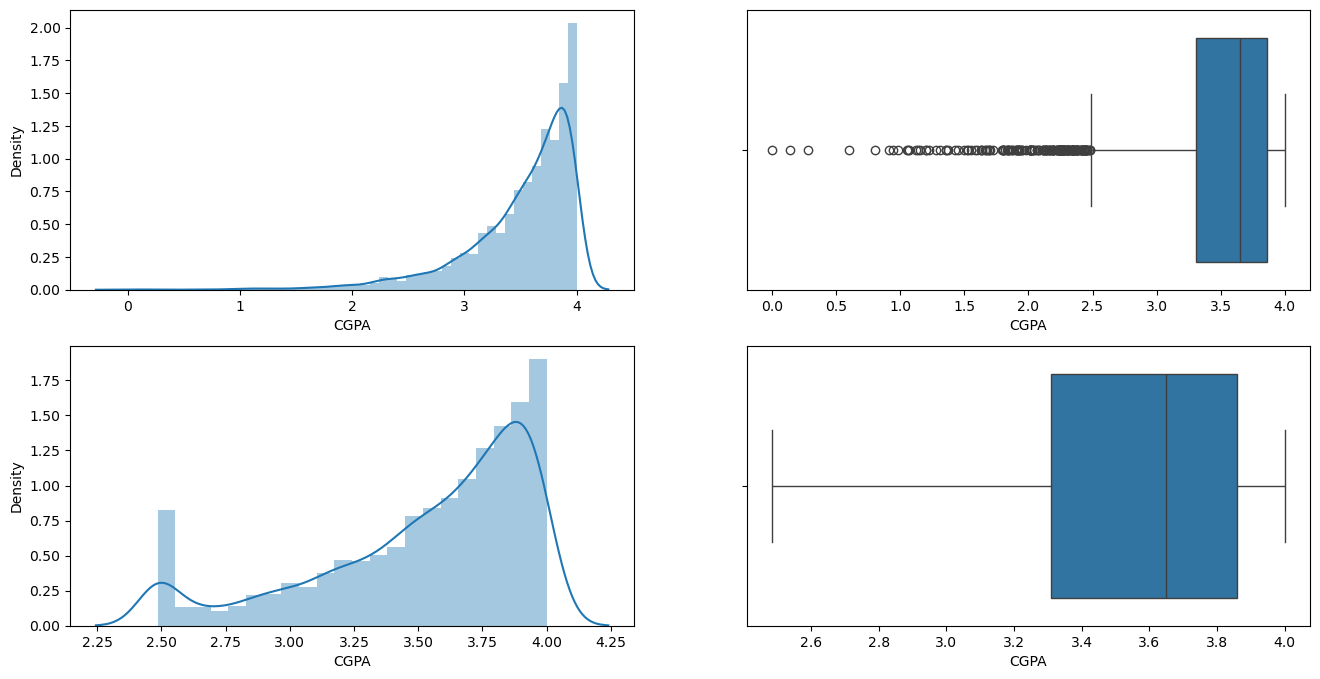

In [311]:
# comparing 

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['CGPA'])

plt.subplot(2,2,2)
sns.boxplot(df['CGPA'],orient='h')

plt.subplot(2,2,3)
sns.distplot(new_df_cap['CGPA'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['CGPA'],orient='h')